# Project 3 - Part 2 - Solution - EDA

- Load in your csv.gz's of results for each year extracted.
- Concatenate the data into 1 dataframe for the remainder of the analysis.


- Once you have your data from the API, they would like you to perform some light EDA to show:
    - How many movies had at least some valid financial information (values > 0 for budget OR revenue)?
        - Please exclude any movies with 0's for budget AND revenue from the remaining visualizations.
    - How many movies are there in each of the certification categories (G/PG/PG-13/R)?
    - What is the average revenue per certification category?
    - What is the average budget per certification category

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [2]:
FOLDER = "Data/"
os.listdir(FOLDER)

['final_tmdb_data_2006.csv.gz',
 'tmdb_api_results_2010.json',
 'final_tmdb_data_2018.csv.gz',
 'final_tmdb_data_2014.csv.gz',
 'tmdb_api_results_2006.json',
 'title_basics_cleaned.csv.gz',
 '.DS_Store',
 'final_tmdb_data_2008.csv.gz',
 'final_tmdb_data_2016.csv.gz',
 'final_tmdb_data_2004.csv.gz',
 'tmdb_api_results_2007.json',
 'final_tmdb_data_2020.csv.gz',
 'tmdb_api_results_2011.json',
 'title_ratings_cleaned.csv.gz',
 'tmdb_api_results_2020.json',
 'tmdb_api_results_2016.json',
 'tmdb_api_results_2000.json',
 'final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2012.csv.gz',
 'tmdb_api_results_2001.json',
 'final_tmdb_data_2010.csv.gz',
 'final_tmdb_data_2002.csv.gz',
 'tmdb_api_results_2017.json',
 'tmdb_api_results_2021.json',
 'tmdb_api_results_2018.json',
 'tmdb_api_results_2002.json',
 'final_tmdb_data_2019.csv.gz',
 'final_tmdb_data_2007.csv.gz',
 'tmdb_api_results_2014.json',
 'final_tmdb_data_2015.csv.gz',
 'tmdb_api_results_2015.json',
 'final_tmdb_data_2021.csv.gz',
 'tmdb_

In [3]:
## Should show students glob
import glob
q  = f"{FOLDER}final*.csv.gz"
files = sorted(glob.glob(q))
files

['Data/final_tmdb_data_2000.csv.gz',
 'Data/final_tmdb_data_2001.csv.gz',
 'Data/final_tmdb_data_2002.csv.gz',
 'Data/final_tmdb_data_2003.csv.gz',
 'Data/final_tmdb_data_2004.csv.gz',
 'Data/final_tmdb_data_2005.csv.gz',
 'Data/final_tmdb_data_2006.csv.gz',
 'Data/final_tmdb_data_2007.csv.gz',
 'Data/final_tmdb_data_2008.csv.gz',
 'Data/final_tmdb_data_2009.csv.gz',
 'Data/final_tmdb_data_2010.csv.gz',
 'Data/final_tmdb_data_2011.csv.gz',
 'Data/final_tmdb_data_2012.csv.gz',
 'Data/final_tmdb_data_2013.csv.gz',
 'Data/final_tmdb_data_2014.csv.gz',
 'Data/final_tmdb_data_2015.csv.gz',
 'Data/final_tmdb_data_2016.csv.gz',
 'Data/final_tmdb_data_2017.csv.gz',
 'Data/final_tmdb_data_2018.csv.gz',
 'Data/final_tmdb_data_2019.csv.gz',
 'Data/final_tmdb_data_2020.csv.gz',
 'Data/final_tmdb_data_2021.csv.gz']

### Concatenating DataFrames

#### Low-Lift Version/Basic Student Version

In [4]:
# df_2000 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz')

# df_2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz')

In [5]:
df = pd.concat([pd.read_csv(f, lineterminator='\n') for f in files] )
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.4,21.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,4.4,7.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1868.0,PG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3528,tt9895024,0.0,/S1kutYyoyuBJKGS0mXxv2fZNbr.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,834443.0,de,Heikos Welt,...,0.0,118.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,NaN,Heiko's World,0.0,0.0,0.0,NaN
3529,tt9896876,0.0,/hMvRbT6HOqERhh3K8kXbaLz9LlZ.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,821493.0,en,India Sweets and Spices,...,0.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Let the aunties talk.,India Sweets and Spices,0.0,6.0,2.0,PG-13
3530,tt9898844,0.0,/q2KFBGyUSzHDhNqXEYv2LqTWVSz.jpg,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,870671.0,en,The Hunting,...,0.0,91.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Hunger runs deep.,The Hunting,0.0,4.9,20.0,NaN
3531,tt9900940,0.0,/3jjWLg5bevWqReyVroYqxwVrH0k.jpg,NaN,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,861294.0,en,The Scrapper,...,0.0,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,You can't escape your past.,The Scrapper,0.0,6.0,2.0,NaN


## How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

- Several ways students could do this either with pandas or with visualizations.

In [6]:
filter_financial = (df['budget'] > 0) | (df['revenue']>0)
filter_financial.value_counts()

False    46748
True     13404
dtype: int64

Text(0.5, 1.0, '# of Movies with Valid Financial Data')

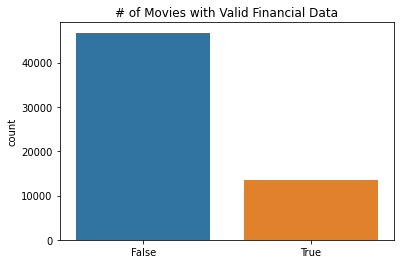

In [7]:
ax = sns.countplot(x=filter_financial)
ax.set_title('# of Movies with Valid Financial Data')

### Please exclude any movies with 0's for budget AND revenue from the remaining visualizations.

In [8]:
plot_df = df[filter_financial].copy()


## How many movies are there in each of the certification categories (G/PG/PG-13/R)?

In [9]:
## to order them (optional)
cert_order = ['G','PG','PG-13','R','NR']#,'NC-17']

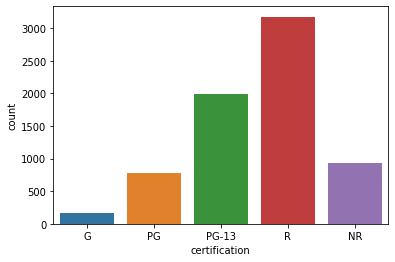

In [10]:
sns.countplot(data=plot_df, x='certification',order=cert_order);

## What is the average revenue per certification category?

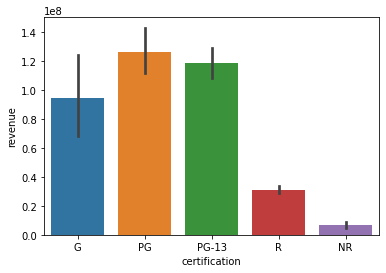

In [11]:
sns.barplot(data=plot_df, x='certification',y='revenue', order=cert_order);

## What is the average budget per certification category?

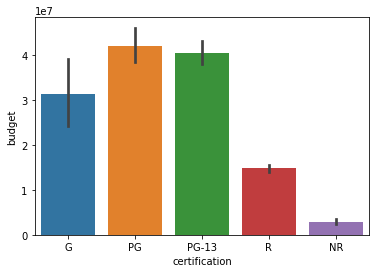

In [12]:
sns.barplot(data=plot_df, x='certification',y='budget', order=cert_order);